
<div style="text-align: center;">
    <strong style="display: block; margin-bottom: 10px;">Group 07</strong> 
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Joana Rodrigues</td>
            <td style="border: 1px solid white; padding: 8px;">20240603</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Mara Simões</td>
            <td style="border: 1px solid white; padding: 8px;">20240326</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Matilde Street</td>
            <td style="border: 1px solid white; padding: 8px;">20240523</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Rafael Silva</td>
            <td style="border: 1px solid white; padding: 8px;">20240511</td>
        </tr>
    </table>
</div>

### 🔗 Table of Contents <a id='table-of-contents'></a>
1. [Imports](#imports)
---

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm



In [28]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.DataFrame(data=df_train, columns=['text', 'label']).reset_index(drop=True)
df_test = pd.DataFrame(data=df_test, columns=['text', 'label']).reset_index(drop=True)

print(df_train.head())

                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0


In [ ]:
df_train.shape

EDA   
1. missing values
2. how many classes do we predict?
3. tudo em lower case pa ser as mms palavras

In [29]:
df_train.isnull().sum()
# No missing values :)

text     0
label    0
dtype: int64

label
2    6178
1    1923
0    1442
Name: count, dtype: int64


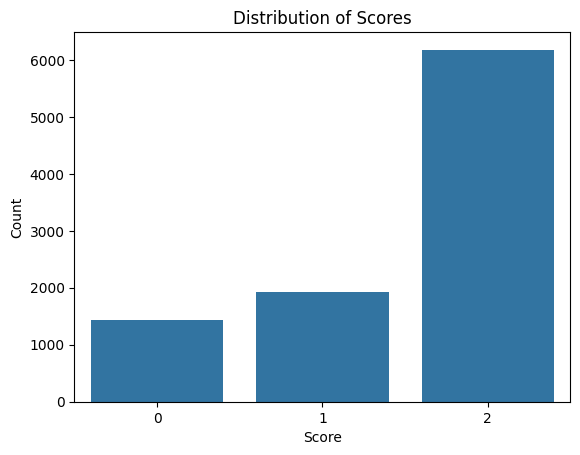

In [30]:
print(df_train['label'].value_counts())
# Visualize distribution of satisfaction
sns.countplot(data=df_train, x='label')
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

Feature engineering

In [31]:
df_train['text_length'] = df_train['text'].apply(len)
df_train['word_count']  = df_train['text'].apply(lambda x: len(str(x).split(" ")))


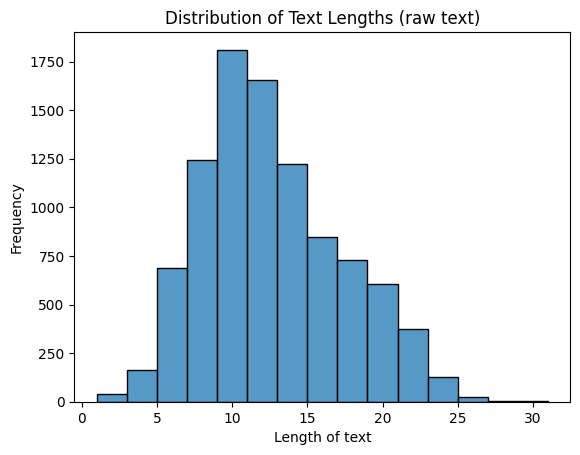

In [32]:
#Plot distribution of text length
sns.histplot(df_train['word_count'], bins=15)
plt.title("Distribution of Text Lengths (raw text)")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.show()

In [33]:
to_remove = df_train['text_length'].quantile(0.005)

print('We will eliminate the texts with less than', to_remove, 'length')  #0.5 percentile

#to see where the labels of the errors
removed_labels = df_train[df_train['text_length'] < 18]['label'].value_counts()
print(removed_labels)

#to see what is being eliminated:
removed = df_train.loc[df_train['text_length'] < 18, ['text', 'label', 'text_length']]
print(removed)

df_train = df_train[df_train['text_length'] >= 24]
df_train = df_train[df_train['text_length'] >= 24].reset_index(drop=True)

We will eliminate the texts with less than 18.0 length
label
2    42
1     5
Name: count, dtype: int64
                   text  label  text_length
1858   SASA聚酯选用英威达PTA技术      2           16
3090          Brent +4%      1            9
3943                 :)      2            2
3948            @TicToc      2            7
3980      100% Correct!      2           13
4358  Cya Jason Garrett      2           17
4360               Damn      2            4
4440                 F5      2            2
4914         Next week.      2           10
5006      Racing on Ice      2           13
5484    Wholesale Trade      2           15
5512         Woke Sachs      2           10
5654         $penn coin      2           10
6511     Housing Starts      2           14
6849     Nasdaq up 0.2%      1           14
6990  Averages end flat      2           17
7935      $WW heavy....      1           13
8055          Long $WMT      1            9
8153    $APOP on scans.      2           15
8167       $CEI W

In [34]:
all_words = ' '.join(df_train['text']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

to     2329
the    1816
of     1463
-      1390
in     1361
on     1130
for    1032
a       967
and     898
The     662
Name: count, dtype: int64

In [35]:
df_train['text'] = df_train['text'].str.lower()
# df_test['text'] = df_test['text'].str.lower() # do we do the test as well?

# Preprocessing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import re
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm


# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('wordnet')

Mudança para a mesma lingua (não serviu de nada)

In [37]:
# from langdetect import detect


# def detect_language(text):
#     try:
#         return detect(text)  
#     except:
#         return 'unknown' 

# df_train['language'] = df_train['text'].apply(detect_language)

# language_distribution = df_train['language'].value_counts()

# print(language_distribution)

# print( df_train[df_train['language'] == 'unknown'], 'tweets with unknown language.')



In [38]:
# initial_rows = len(df_train)

# language_counts = df_train['language'].value_counts()

# languages_to_keep = language_counts[language_counts > 1].index

# df_train = df_train[df_train['language'].isin(languages_to_keep)]

# final_rows = len(df_train)

# removed_rows = initial_rows - final_rows
# print(f"{removed_rows} linhas foram removidas.")


In [39]:
# from googletrans import Translator

# translator = Translator()

# def translate_to_english(text, detected_language):
#     try:
#         if detected_language != 'en':
#             translated = translator.translate(text, src=detected_language, dest='en')
#             return translated.text
#         else:
#             return text
#     except Exception as e:
#         print(f"Error translating text: {e}")
#         return text

# df_train['translated_text'] = df_train.apply(
#     lambda row: translate_to_english(row['text'], row['language']),
#     axis=1)


# df_french = df_train[df_train['language'] == 'pt']
# df_french[['text', 'clean_text']].head(20)



In [ ]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

def clean(text_list, lemmatize=True, stem=False):
    cleaned = []

    for text in tqdm(text_list):
        text = text.lower()

        text = re.sub("[^a-zA-Z]", " ", text)
        text = re.sub("br", "", text)
        text = re.sub(r"http\S+", "", text)
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

        text = " ".join([word for word in text.split() if word not in stop])

        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())

        if stem:
            text = " ".join(stemmer.stem(word) for word in text.split())

        cleaned.append(text)

    return cleaned

df_train['clean_text'] = clean(df_train['text'], lemmatize=True, stem=False)

df_train[['text', 'clean_text']].head()


100%|██████████| 9459/9459 [00:00<00:00, 19935.22it/s]


,text,clean_text
0,$bynd - jpmorgan reels in expectations on beyo...,bynd jpmorgan reel expectation beyond meat co ...
1,$ccl $rcl - nomura points to bookings weakness...,ccl rcl nomura point booking weakness carnival...
2,"$cx - cemex cut at credit suisse, j.p. morgan ...",cx cemex cut credit suisse j p morgan weak bui...
3,$ess: btig research cuts to neutral https://t....,es btig research cut neutral co mcyftsxc n
4,$fnko - funko slides after piper jaffray pt cu...,fnko funko slide piper jaffray pt cut co z ijm...


Bag of Words (Bow)


In [47]:
%pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 802.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.1 MB 13.1 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/11.1 MB 11.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/11.1 MB 14.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.1 MB 16.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.1 MB 17.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.1 MB 17.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 17.7 MB/s eta 0:00:01
   ----------------------- ---------------- 6.5/11.1 MB 17.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 17.8 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\joana\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
#CountVectorizer?

### Create BoW from train corpus

A PARTIR DAQUI ESTÁ NAO FEITO

In [51]:
bow = CountVectorizer(binary=True)
X = bow.fit_transform(df_train["text"])

In [52]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 118513 stored elements and shape (9459, 20660)>

In [53]:
print(X[10:13].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
print(bow.get_feature_names_out()[10000:10022])

['italian' 'italians' 'italienisches' 'italy' 'itau' 'itaãƒâº' 'itci'
 'itcitsweb1' 'item' 'items' 'itiv0jhjbm' 'itjawvms1k' 'itlbcyibxj'
 'itmzmp6wlo' 'itp' 'itplhncbxg' 'itrm' 'itrn' 'its' 'itself' 'itt'
 'itu4wdk0ac']


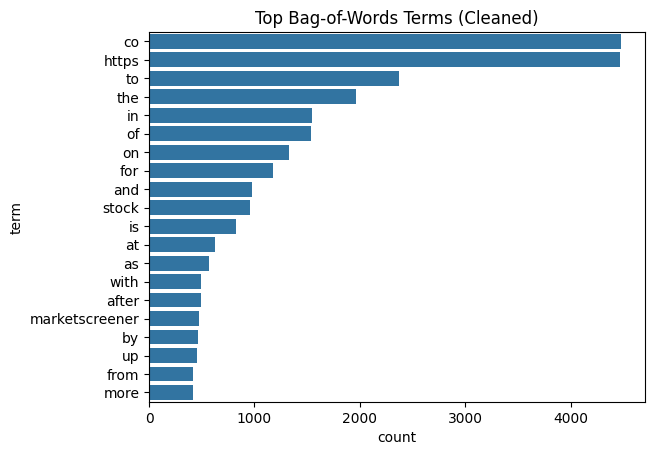

In [55]:
# 🔍 Visualize top Bag of Words terms (Cleaned)
clean_bow_sum = np.array(X.sum(axis=0)).flatten()
clean_terms = bow.get_feature_names_out() # in older versions is get_feature_names()
clean_top = pd.DataFrame({'term': clean_terms, 'count': clean_bow_sum}).sort_values(by='count', ascending=False).head(20)

sns.barplot(data=clean_top, x='count', y='term')
plt.title("Top Bag-of-Words Terms (Cleaned)")
plt.show()

# 6. Define labels

In [57]:
y = np.array(df_train['label'])

In [58]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
len(y)

9459

# 7. Train Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
#KNeighborsClassifier?

In [62]:
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

In [63]:
modelknn.fit(X,y)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

## Predict with 2 examples

In [ ]:
test.shape

(2, 41928)

### Predict - apply KNN

In [67]:
predict = modelknn.predict(df_test)

C:\Users\joana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts'

In [ ]:
predict

array([1, 0])

In [ ]:
for review, score in zip(test_sentences, predict):
    print(f'The predicted score for the review: "{review}", is {score}.')

The predicted score for the review: "The restaurant is good.", is 1.
The predicted score for the review: "Terrible restaurant!", is 0.


# Predict for Test corpus

In [ ]:
update_df(amazon_df_test, clean(amazon_df_test['Text'], lemmatize = True, stemmer = False))

100%|██████████| 5000/5000 [00:01<00:00, 4042.10it/s]


In [ ]:
X_test = bow.transform(amazon_df_test['Text'])
y_test = np.array(amazon_df_test['new_score'])

In [ ]:
y_pred = modelknn.predict(X_test)

# Evaluate

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
labels = {"Below Five":0, "Five":1}
print(classification_report(y_pred, y_test, target_names = labels.keys()))

              precision    recall  f1-score   support

  Below Five       0.39      0.74      0.51       927
        Five       0.93      0.73      0.82      4073

    accuracy                           0.73      5000
   macro avg       0.66      0.74      0.66      5000
weighted avg       0.83      0.73      0.76      5000



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 689,  238],
       [1089, 2984]])

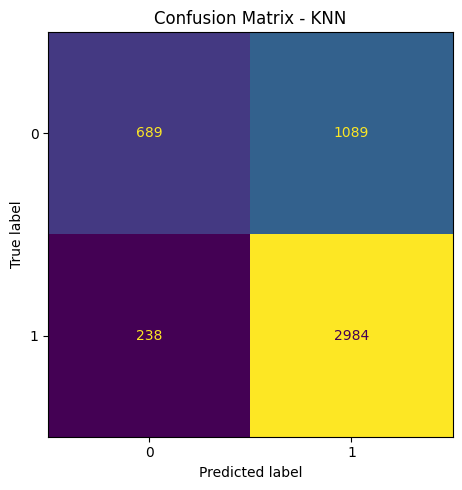

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, colorbar=False)
ax.set_title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()